# k-Means Clustering

k-means clustering is an unsupervised algorithm where you decide *a priori* how many clusters to find and it will cluster the dataset into that many clusters.  For instance, we can cluster the *iris* dataset.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data

print(X[:5, ])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


Remember that k-means clustering is an *unsupervised* learning algorithm.  In classification, which is a *supervised* learning algorithm, we'd want the labels as well.  But here, we just need the data.  Also note that since we are performing an unsupervised/clustering, we don't need a train/validation or to use cross-validation, so we just use all the data.

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

At this point, we have our clusters, but we want to visualize them.  For this we use python's matplotlib library.

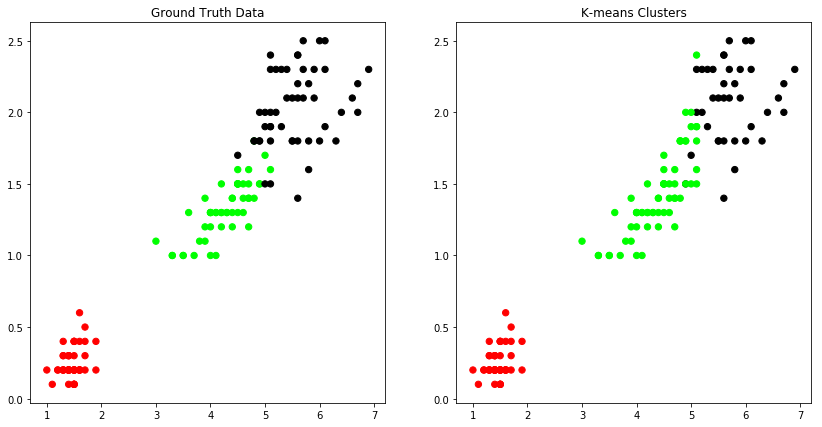

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# This is necessary in Jupyter so that plots show up
%matplotlib inline

np.random.seed(1234)

X = iris.data
y = iris.target

# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
# plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.scatter(X[:, 2], X[:, 3], c=colormap[y], s=40)
plt.title('Ground Truth Data')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=colormap[predY], s=40)
plt.title('K-means Clusters')

# Gaussian Mixture Models and EM

So where does k-means not work well?

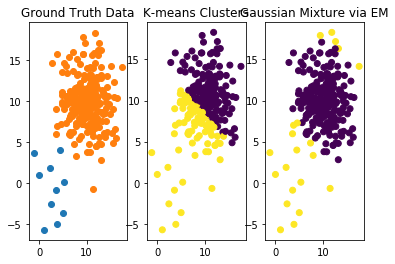

In [4]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

N1 = 20
N2 = 500

m1 = 1
m2 = 10

v1 = 3
v2 = 3

# Generate some random Gaussian data
G1 = np.random.normal(m1, v1, N1).reshape((int(N1/2), 2))
G2 = np.random.normal(m2, v2, N2).reshape((int(N2/2), 2))

data = np.append(G1, G2).reshape((int((N1 + N2)/2), 2))
model = KMeans(n_clusters=2)
model.fit(data)

plt.subplot(1, 3, 1)
plt.scatter(G1[:, 0], G1[:, 1])
plt.scatter(G2[:, 0], G2[:, 1])
plt.title('Ground Truth Data')
 
# Plot Predicted with corrected values
plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=model.labels_)
plt.title('K-means Clusters')

model = GaussianMixture(n_components=2)
model.fit(data)

# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.predict(data), [0, 1]).astype(np.int64)

plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=predY)
plt.title('Gaussian Mixture via EM')
